# Randomized Election

This outbook analyzes the effect state geography has on presidential elections in the United States of America.

In [18]:
# Import Libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shapely
import networkx as nx
import pysal as ps
import pandas as pd
import geopandas as gp
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
from matplotlib.colors import ListedColormap

%matplotlib inline


# To-Do List:
# Double-check that electoral vote calculator is working
# Plot randomized maps, with electoral vote counts PER STATE on top of polygons

# Import helper functions we defined in `elec_utils.py`

In [19]:
## Define functions we'll be using
from elec_utils import plot_single_new_states, make_states, plot_multiple_new_states, randomize_election, plot_counties, plot_polygons

# Read in and preview data

In [20]:
election = gp.read_file('../data/election-map.shp')
election.head(n=5)

,FID,dem,dempc,geometry,gop,goppc,grn,lib,margin,name,newstate,oth,population,state,una,votes
0,1001,5908,0.239569,"POLYGON ((892112.80012558 1115678.795392964, 8...",18110,0.734358,105,538,0.494789,Autauga,AL,0,54571,AL,0,24661
1,1003,18409,0.195653,"POLYGON ((780232.5698541742 947375.2080644479,...",72780,0.773515,453,2448,0.577862,Baldwin,AL,0,182265,AL,0,94090
2,1005,4848,0.466603,"POLYGON ((1026127.598653847 1057957.143773036,...",5431,0.522714,18,93,0.056112,Barbour,AL,0,27457,AL,0,10390
3,1007,1874,0.214220,"POLYGON ((845034.8675876737 1149437.158844963,...",6733,0.769662,17,124,0.555441,Bibb,AL,0,22915,AL,0,8748
4,1009,2150,0.084699,"POLYGON ((871035.6126721548 1287748.49965, 886...",22808,0.898519,89,337,0.813820,Blount,AL,0,57322,AL,0,25384


# View Initial Plots of data

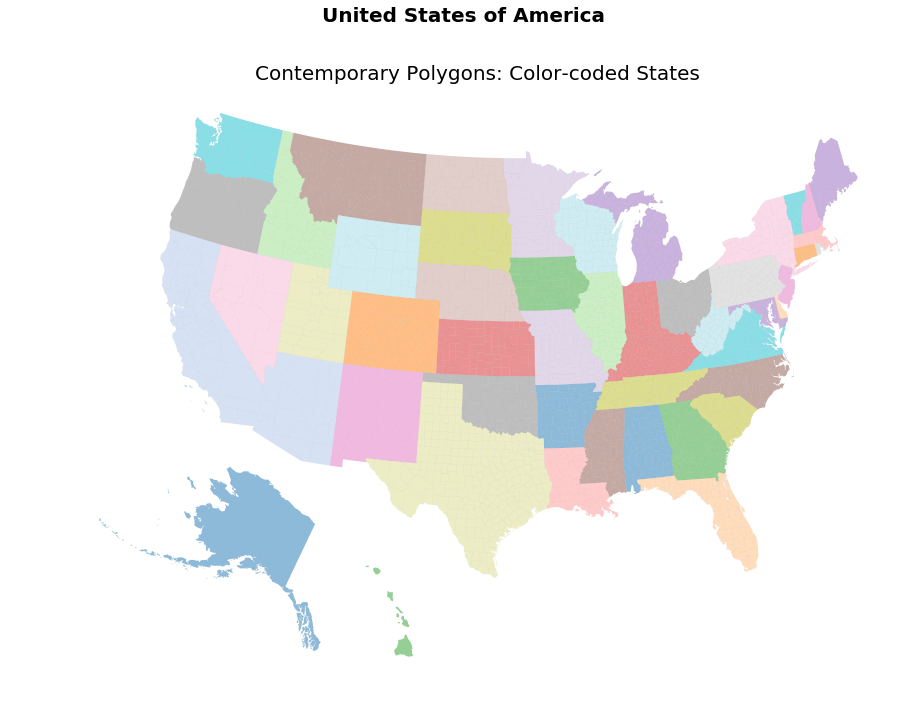

In [5]:
# States
plot_single_new_states(election, annotate=False, 
                       sup_title="United States of America", 
                       plot_title="Contemporary Polygons: Color-coded States", 
                       lwd=.01)

# Randomly Generate States

In [4]:
# Randomly generate states
states = randomize_election(election)
states.head(n=5)

/Users/jared/miniconda2/envs/geo/lib/python2.7/site-packages/pysal/weights/weights.py:189: UserWarning: There are 5 disconnected observations
  warnings.warn("There are %d disconnected observations" % ni)
/Users/jared/miniconda2/envs/geo/lib/python2.7/site-packages/pysal/weights/weights.py:190: UserWarning: Island ids: 67, 518, 519, 520, 521
  warnings.warn("Island ids: %s" % ', '.join(str(island) for island in self.islands))


,newstate,geometry,FID,dem,dempc,gop,goppc,grn,lib,margin,oth,population,una,votes,win
0,AK,(POLYGON ((-1882164.772212857 419730.666193547...,2001,93007,0.377176,130415,0.528878,4445,14593,0.151702,4128,710231,0,246588,R
1,AL,(POLYGON ((1050871.995342995 795082.7110867524...,878282,975581,0.356115,1691039,0.617277,9303,61622,0.261162,1969,6183861,0,2739514,R
2,AR,"POLYGON ((370262.4536953867 1189789.081994564,...",2797183,1135679,0.391539,1646916,0.567794,22087,79649,0.176255,15822,6807641,397,2900550,R
3,AZ,(POLYGON ((-2181058.644370982 1496661.36574971...,104806,4946940,0.564953,3338886,0.381309,142181,296247,-0.183644,32126,28750202,0,8756380,D
4,CA,POLYGON ((-1774341.246516789 2145606.616457753...,822670,1554337,0.541878,1122043,0.391170,52751,121425,-0.150708,17872,7807002,0,2868428,D


# Visualize Randomly Generated States

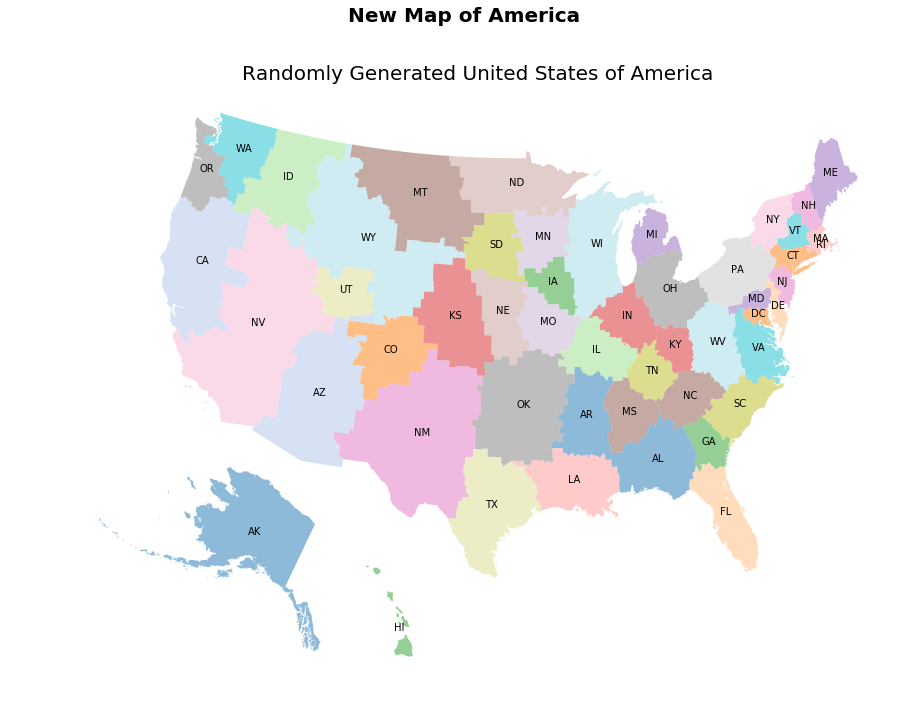

In [7]:
plot_single_new_states(states, annotate=True, 
                       sup_title="New Map of America", 
                       plot_title="Randomly Generated United States of America", 
                       lwd=0)

# Visualize Multiple State Randomizations Alongside Election Victories

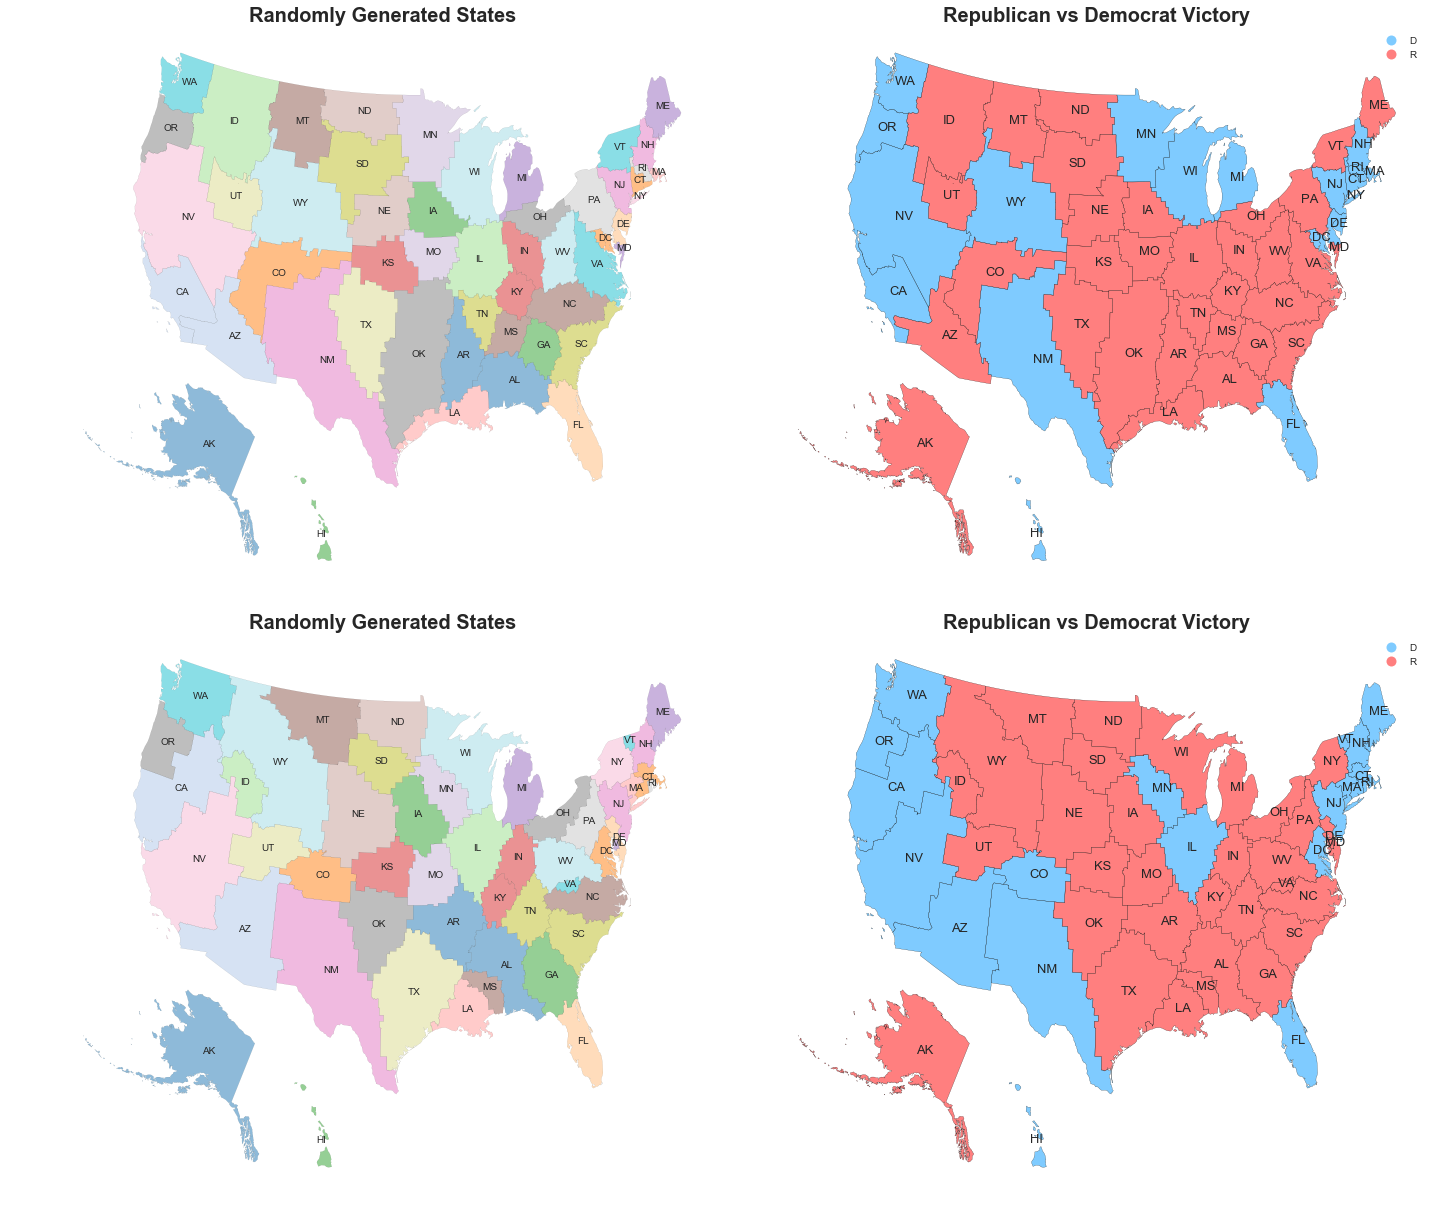

In [5]:
plot_multiple_new_states(election, k=4)

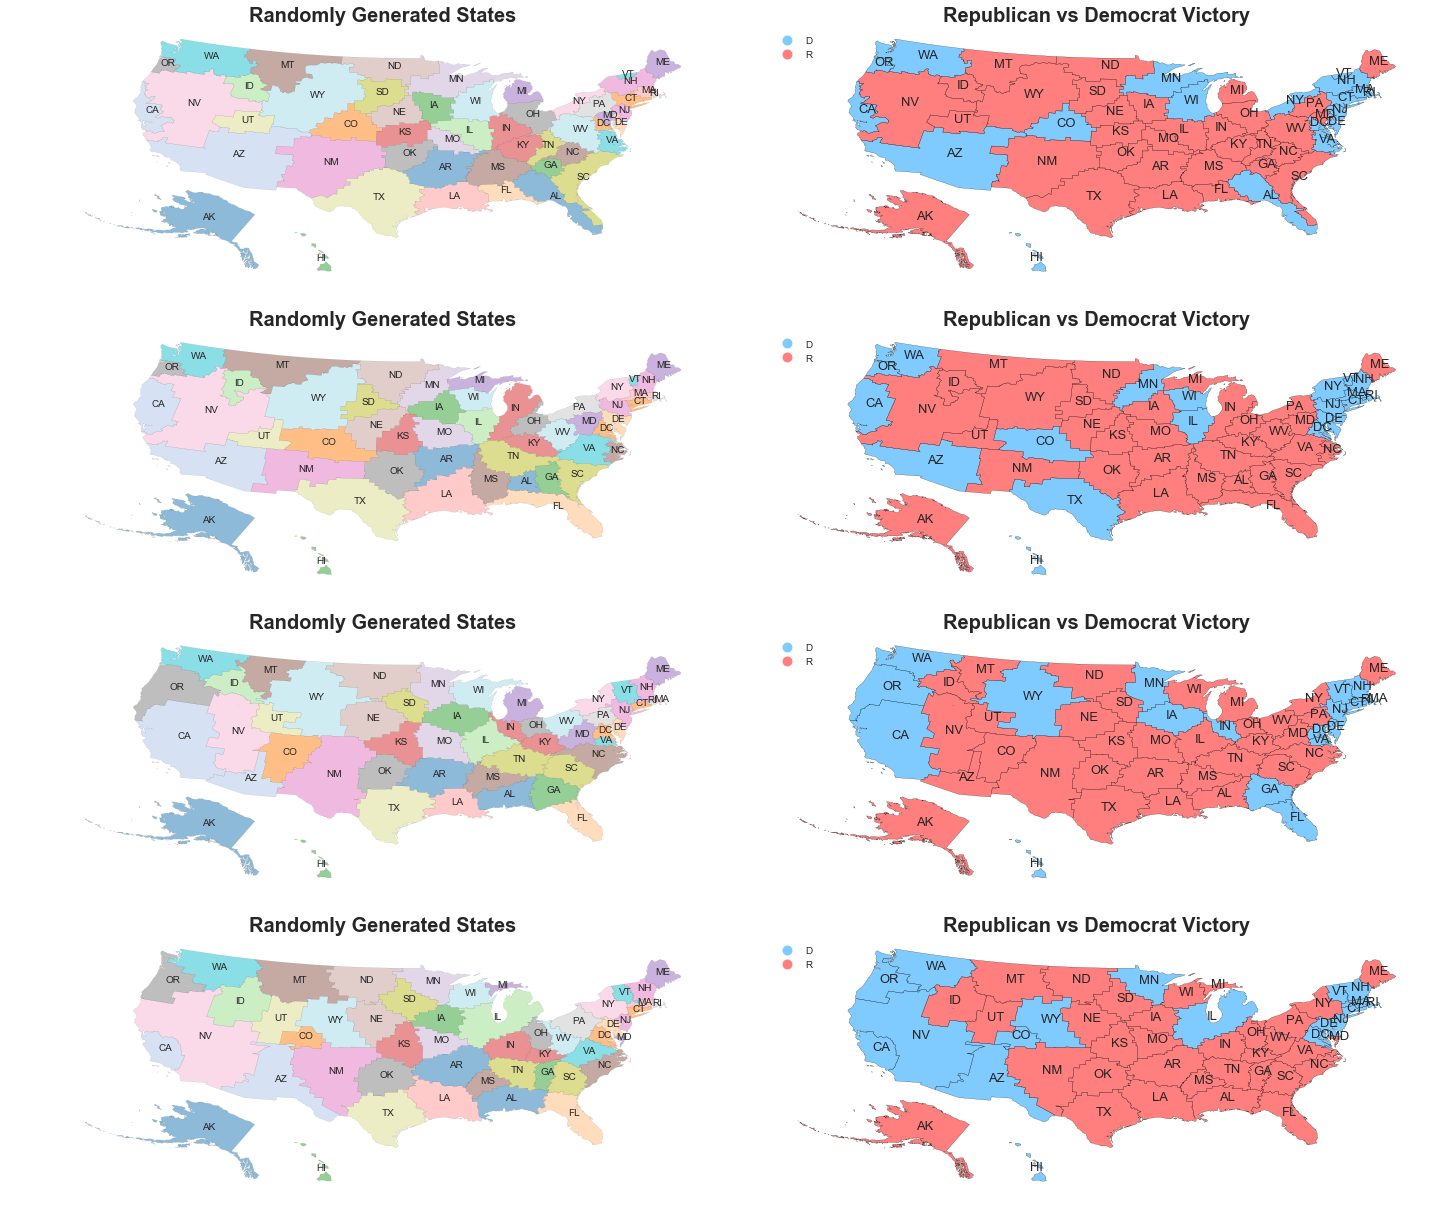

In [6]:
plot_multiple_new_states(election, k=8)

# Analyzing the Results


## Vote Count by State

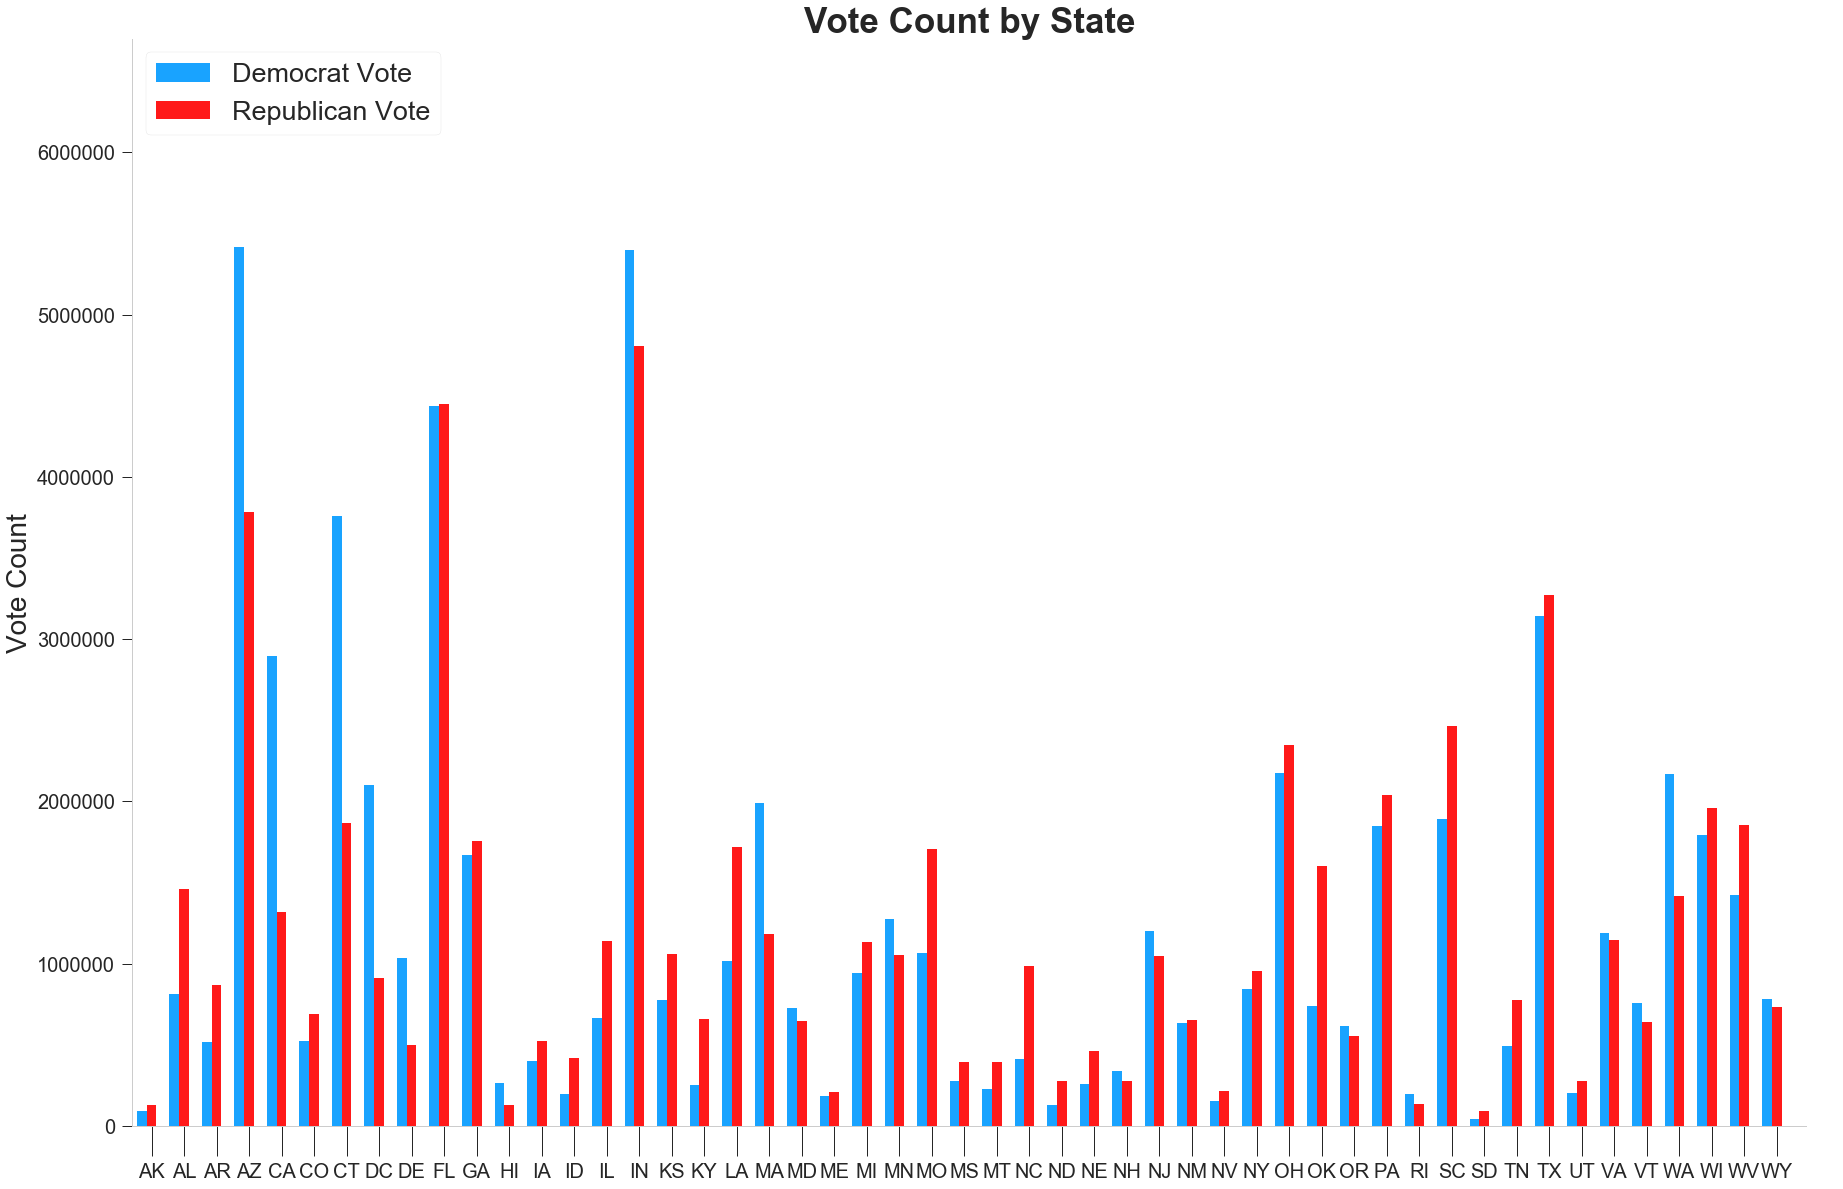

In [226]:
new_style = {'grid': False}
matplotlib.rc('axes', **new_style)
pos = list(range(len(states['dem'])))
width = 0.3
fig, ax = plt.subplots(figsize=(30,20))

plt.bar(pos,
        #using df['pre_score'] data,
        states['dem'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.9,
        # with color
        color='#0099ff',
        # with label the first value in first_name
        label=states['newstate'][0])

plt.bar([p + width for p in pos],
        #using df['mid_score'] data,
        states['gop'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.9,
        # with color
        color='#ff0000',
        # with label the second value in first_name
        label=states['newstate'][1])

ax.set_title('Vote Count by State', size=35, fontweight='bold')
ax.set_ylabel('Vote Count', fontsize=28)
ax.set_xticks([p + 1 * width for p in pos])
ax.set_xticklabels(states['newstate'])
plt.tick_params(axis='x', which='major', labelsize=20, length=30)
plt.tick_params(axis='y', which='major', labelsize=20, length=10)
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(states['dem'] + states['gop'])-3500000] )
ax.set_facecolor('white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid(False) # horizontal lines
ax.xaxis.grid(False)
ax.grid(False)
#ax.right_ax(False)
# Adding the legend and showing the plot
plt.legend(['Democrat Vote', 'Republican Vote'], loc='upper left', fontsize=27, frameon=True)
plt.show()

# Analyzing Electoral Votes for a Single Generation of States

In [110]:
def get_max_idx(L):
    """Finds max element of L"""
    max_i = 0
    for i in range(len(L)):
        if L[i] >= L[max_i]:
            max_i = i
    return max_i

def remove_i(L, i):
    """Removes item i from L"""
    return L[:i] + L[i+1:]

def insert_i(L, i, x):
    """Inserts item x into position i of L"""
    return L[:i] + [x] + L[i:]

def apportion(pops, states, seats_to_assign=435, initial=1, extras=2, exclude='DC'):
    pops = list(pops)
    states = list(states)
    assigned = [initial] * len(pops)
    ex = states.index(exclude)
    assigned = remove_i(assigned, ex)
    pops = remove_i(pops, ex)
    remaining = seats_to_assign - sum(assigned)
    while remaining > 0:
        priorities = [p / np.sqrt(a * (a + 1)) for p, a in zip(pops, assigned)]
        max_priority = get_max_idx(priorities)
        assigned[max_priority] += 1
        remaining -= 1
    assigned = insert_i(assigned, ex, 1)
    assign_excess = int(np.floor((538-seats_to_assign)/51))
    assigned = [__ + assign_excess for __ in assigned]
    
    return assigned

def run_election(df, st='state', pop='population', ev='ev', seats_to_assign=435):
    states = make_states(df, st)
    states[ev] = apportion(states[pop], states[st], seats_to_assign=seats_to_assign)
    return (sum(states.ev[states.win == 'R']), sum(states.ev[states.win == 'D']))


In [140]:
state1 = randomize_election(election)

In [143]:
run_election(state1, st='newstate', seats_to_assign=538)

(291, 248)

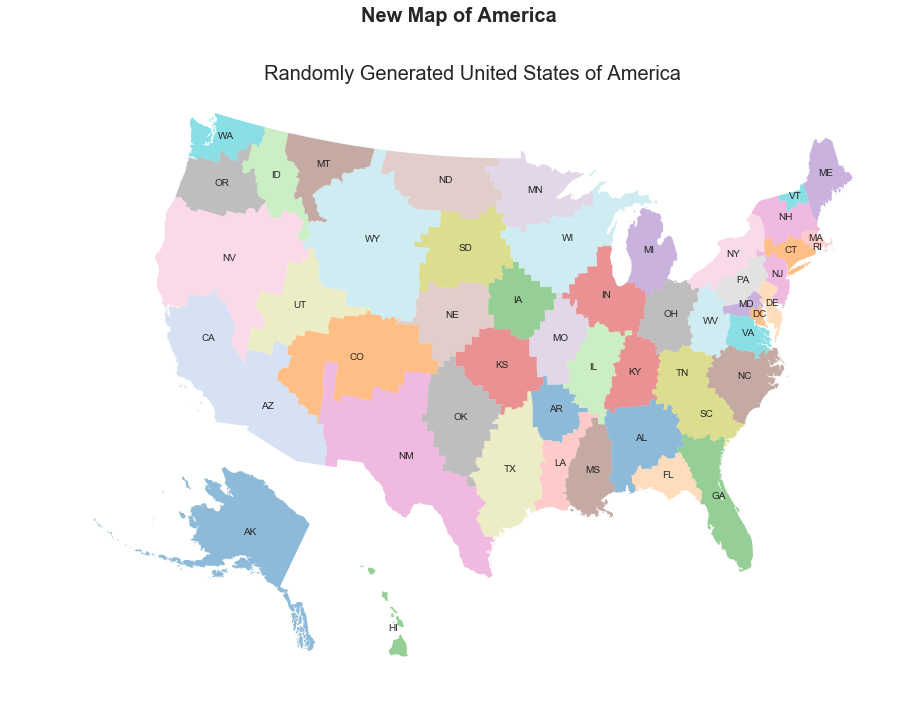

In [144]:
plot_single_new_states(state1, annotate=True, 
                       sup_title="New Map of America", 
                       plot_title="Randomly Generated United States of America", 
                       lwd=0)

In [291]:
rep_wins, dem_wins = run_election(state1, st='newstate')
print "Total Republican Electoral Votes: {}".format(rep_wins)
print "Total Democrat Electoral Votes: {}".format(dem_wins)

Total Republican Electoral Votes: 281
Total Democrat Electoral Votes: 257


# Simulation Stuff

In [98]:
def store_data(k=100):
    data_storage = {'electoral_votes': [],
                   'winner': [],
                   'total_rep_states': [],
                   'total_dem_states': [],
                    'votes_per_state'
                   }
    
    for i in xrange(k):
        
        # generate new state
        new_states = randomize_election(election)
        
        # append electoral_votes to data_storage
        electoral_vote = run_election(new_states, st="newstate")
        data_storage['electoral_votes'].append(electoral_vote)
        
        # append state party victories
        data_storage['total_dem_states'].append(np.sum(new_states['win']=='D'))
        data_storage['total_rep_states'].append(np.sum(new_states['win']=='R'))
        
        # append election winner
        if electoral_vote[0] >= electoral_vote[1]:
            data_storage['winner'].append('R')
        else:
            data_storage['winner'].append('D')
        
        
        
    return data_storage 

In [127]:
data = store_data()

In [130]:
data.keys()

['total_rep_states',
 'total_dem_votes',
 'winner',
 'total_rep_votes',
 'electoral_votes',
 'total_dem_states']

In [136]:
newdata = pd.DataFrame(data)
newdata['rep_electoral'] = newdata['electoral_votes'].apply(lambda x: x[0])
newdata['dem_electoral'] = newdata['electoral_votes'].apply(lambda x: x[1])

In [137]:
newdata.head(n=5)

,electoral_votes,total_dem_states,total_dem_votes,total_rep_states,total_rep_votes,winner,rep_electoral,dem_electoral
0,"(275, 263)",21,62296378,30,61059569,R,275,263
1,"(323, 215)",16,62296378,35,61059569,R,323,215
2,"(292, 246)",19,62296378,32,61059569,R,292,246
3,"(288, 250)",18,62296378,33,61059569,R,288,250
4,"(237, 301)",22,62296378,29,61059569,D,237,301


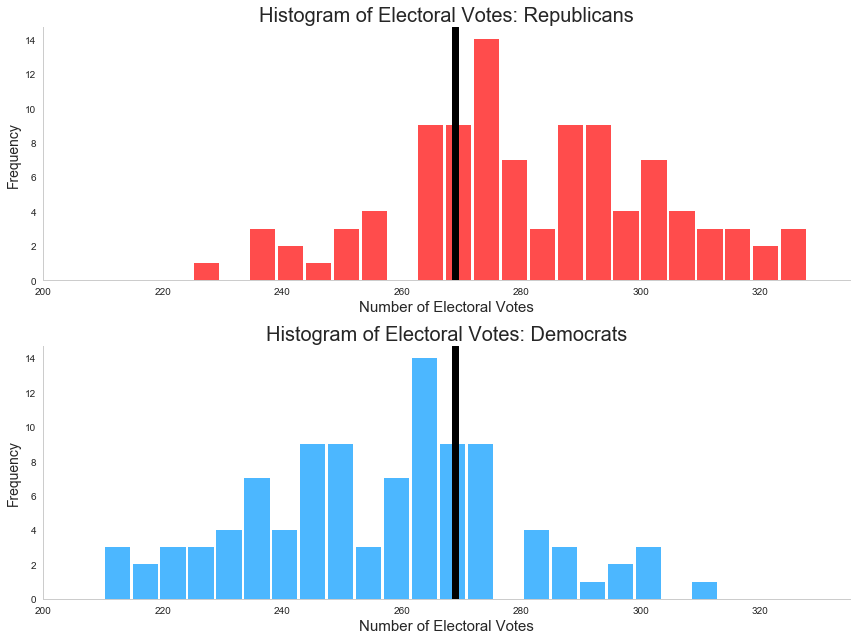

In [216]:
hfont = {'fontname':'sans-serif'}
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(2,1,1)
ax1.hist(newdata['rep_electoral'],22, alpha=0.7, label='Republican',rwidth=.9, color='red')
ax1.axvline(x=269, c='k', linewidth=7)
ax1.set_title("Histogram of Electoral Votes: Republicans", fontsize=20, **hfont)
ax1.grid(False)
ax1.set_xlabel('Number of Electoral Votes', fontsize=15)
ax1.set_ylabel('Frequency', fontsize=14)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlim(200,335)


ax2 = fig.add_subplot(2,1,2)
ax2.hist(newdata['dem_electoral'], 22, alpha=0.7, label='Democrat',rwidth=.9, color='#0099ff')
ax2.axvline(x=269, c='k', linewidth=7)
ax2.set_title("Histogram of Electoral Votes: Democrats", fontsize=20, **hfont)
ax2.grid(False)
ax2.set_xlabel('Number of Electoral Votes', fontsize=15)
ax2.set_ylabel('Frequency', fontsize=14)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xlim(200,335)

plt.tight_layout()
plt.show()

def histograms_of_electoral_votes(rep_electoral, dem_electoral):
    hfont = {'fontname':'sans-serif'}
    fig = plt.figure(figsize=(12,9))
    ax1 = fig.add_subplot(2,1,1)
    ax1.hist(rep_electoral,22, alpha=0.7, label='Republican',rwidth=.9, color='red')
    ax1.axvline(x=269, c='k', linewidth=7)
    ax1.set_title("Histogram of Electoral Votes: Republicans", fontsize=20, **hfont)
    ax1.grid(False)
    ax1.set_xlabel('Number of Electoral Votes', fontsize=15)
    ax1.set_ylabel('Frequency', fontsize=14)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.set_xlim(200,335)


    ax2 = fig.add_subplot(2,1,2)
    ax2.hist(dem_electoral, 22, alpha=0.7, label='Democrat',rwidth=.9, color='#0099ff')
    ax2.axvline(x=269, c='k', linewidth=7)
    ax2.set_title("Histogram of Electoral Votes: Democrats", fontsize=20, **hfont)
    ax2.grid(False)
    ax2.set_xlabel('Number of Electoral Votes', fontsize=15)
    ax2.set_ylabel('Frequency', fontsize=14)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.set_xlim(200,335)

    plt.tight_layout()
    plt.show()

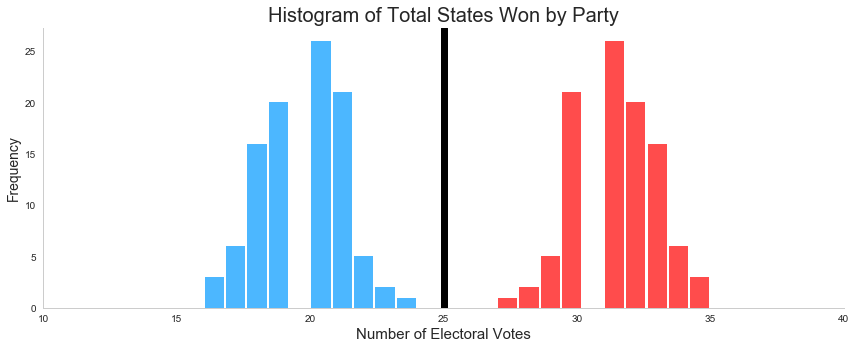

In [224]:
hfont = {'fontname':'sans-serif'}
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(2,1,1)
ax1.hist(newdata['total_rep_states'],10, alpha=0.7, label='Republican',rwidth=.9, color='red')
ax1.axvline(x=25, c='k', linewidth=7)
ax1.set_title("Histogram of Total States Won: Republicans", fontsize=20, **hfont)
ax1.grid(False)
ax1.set_xlabel('Number of Electoral Votes', fontsize=15)
ax1.set_ylabel('Frequency', fontsize=14)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlim(10,40)


ax2 = fig.add_subplot(2,1,1)
ax2.hist(newdata['total_dem_states'], 10, alpha=0.7, label='Democrat',rwidth=.9, color='#0099ff')
ax2.axvline(x=269, c='k', linewidth=7)
ax2.set_title("Histogram of Total States Won by Party", fontsize=20, **hfont)
ax2.grid(False)
ax2.set_xlabel('Number of Electoral Votes', fontsize=15)
ax2.set_ylabel('Frequency', fontsize=14)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xlim(10,40)

plt.tight_layout()
plt.show()

def histogram_of_total_states_won(rep_states, dem_states):
    hfont = {'fontname':'sans-serif'}
    fig = plt.figure(figsize=(12,9))
    ax1 = fig.add_subplot(2,1,1)
    ax1.hist(rep_states,10, alpha=0.7, label='Republican',rwidth=.9, color='red')
    ax1.axvline(x=25, c='k', linewidth=7)
    ax1.set_title("Histogram of Total States Won: Republicans", fontsize=20, **hfont)
    ax1.grid(False)
    ax1.set_xlabel('Number of Electoral Votes', fontsize=15)
    ax1.set_ylabel('Frequency', fontsize=14)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.set_xlim(10,40)


    ax2 = fig.add_subplot(2,1,1)
    ax2.hist(dem_states, 10, alpha=0.7, label='Democrat',rwidth=.9, color='#0099ff')
    ax2.axvline(x=269, c='k', linewidth=7)
    ax2.set_title("Histogram of Total States Won by Party", fontsize=20, **hfont)
    ax2.grid(False)
    ax2.set_xlabel('Number of Electoral Votes', fontsize=15)
    ax2.set_ylabel('Frequency', fontsize=14)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.set_xlim(10,40)

    plt.tight_layout()
    plt.show()

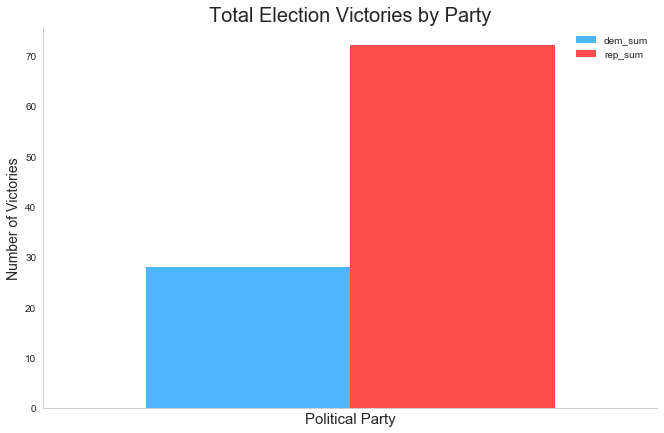

In [283]:
elec_votes = pd.DataFrame({'dem_sum': newdata['winner'].value_counts()['D'],
                     'rep_sum': newdata['winner'].value_counts()['R']}, 
                    index=[0])
plt.figure(figsize=(20,20))
elec_votes.plot(kind='bar', color=['#0099ff','#ff0000'], width=1, alpha=.7, figsize=(11,7))
hfont = {'fontname':'sans-serif'}
plt.title("Total Election Victories by Party", fontsize=20, **hfont)
plt.xlabel('Political Party', fontsize=15)
plt.ylabel('Number of Victories', fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks([])

plt.show()



# Republicans clearly win more electoral votes and states, but who wins in overall votes?

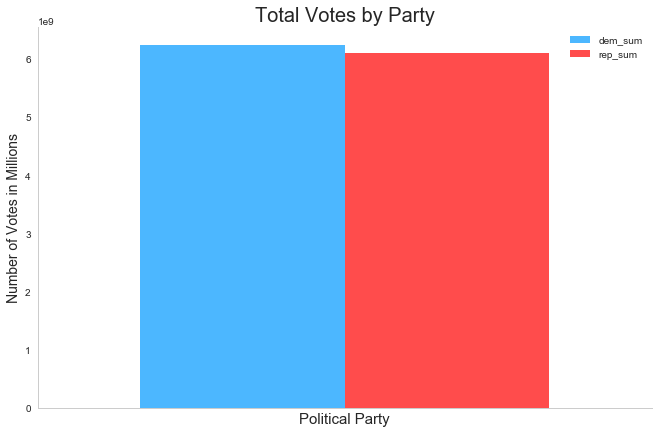

In [285]:
total_votes = pd.DataFrame({'dem_sum': newdata['total_dem_votes'].sum(),
                     'rep_sum': newdata['total_rep_votes'].sum()}, 
                    index=[0])
plt.figure(figsize=(20,20))
total_votes.plot(kind='bar', color=['#0099ff','#ff0000'], width=1, alpha=.7, figsize=(11,7))
hfont = {'fontname':'sans-serif'}
plt.title("Total Votes by Party", fontsize=20, **hfont)
ax1.grid(False)
plt.xlabel('Political Party', fontsize=15)
plt.ylabel('Number of Votes in Millions', fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks([])

plt.show()

In [131]:
len(data['total_dem_states'])

100

In [72]:
new_states = randomize_election(election)
run_election(new_states)

(305, 233)

In [73]:
new_states = randomize_election(election)
run_election(new_states)

(305, 233)

In [91]:
new_states = randomize_election(election)
run_election(new_states,"newstate")

(290, 248)

In [86]:
def run_election(df, st='state', pop='population', ev='ev'):
    states = make_states(election, st)
    states[ev] = apportion(states[pop], states[st])
    return (sum(states.ev[states.win == 'R']), sum(states.ev[states.win == 'D']))

In [76]:
new_states = randomize_election(election)

In [82]:
new_states.head()

,newstate,geometry,FID,dem,dempc,gop,goppc,grn,lib,margin,oth,population,una,votes,win
0,AK,(POLYGON ((-1882164.772212857 419730.666193547...,2001,93007,0.377176,130415,0.528878,4445,14593,0.151702,4128,710231,0,246588,R
1,AL,"(POLYGON ((610116.3070924035 720530.642525557,...",1445426,1236576,0.374761,1970367,0.597146,17110,66267,0.222385,6881,7478150,2441,3299642,R
2,AR,"POLYGON ((508639.2969769664 1062934.046872699,...",1192888,386726,0.346549,680452,0.609759,7737,30893,0.263210,10064,2971974,64,1115936,R
3,AZ,(POLYGON ((-2077428.848194205 1354705.72972257...,423797,4638996,0.566549,3104324,0.379123,131497,283681,-0.187426,29532,27065249,139,8188169,D
4,CA,"POLYGON ((-1585095.067196157 1684168.91095107,...",757708,2262032,0.577039,1412480,0.360320,58752,141986,-0.216719,44431,10673391,387,3920068,D


In [107]:
#data.groupby(['col1', 'col2'])['col3'].mean()
states.groupby('newstate').sum()

,FID,dem,dempc,gop,goppc,grn,lib,margin,oth,population,una,votes
newstate,,,,,,,,,,,,
AK,2001,93007,0.377176,130415,0.528878,4445,14593,0.151702,4128,710231,0,246588
AL,1496016,811066,0.344335,1461509,0.620478,12605,65059,0.276143,4988,5552961,230,2355457
AR,1445883,518743,0.360459,869830,0.604419,8895,29244,0.243960,11206,3730481,1200,1439118
AZ,499050,5413747,0.554285,3782647,0.387285,144073,326750,-0.167000,56960,31388642,42910,9767087
CA,263819,2896903,0.647734,1315192,0.294071,84580,156713,-0.353663,18979,13140279,0,4472367
CO,487805,522594,0.394158,686986,0.518148,16190,71902,0.123990,13219,2533908,14958,1325849
CT,393561,3760564,0.646663,1864657,0.320645,77383,112734,-0.326018,0,15652964,0,5815338
DC,786621,2097717,0.665906,910852,0.289144,36590,86779,-0.376762,540,6922651,17691,3150169
DE,408553,1032679,0.653020,497990,0.314907,16588,32013,-0.338113,1971,3376590,149,1581390


# Additional Ideas

## analyze if an effect between state  population size and democrat votes
## analyze if an effect between state  population size and republican votes

`states.groupby('newstate').sum()`

1. store tuples of (state population, dem votes)
2. Concatenate all of those together into one giant list of tuples
3. Scatter plot, *should I normalize before?* probably not because the relationship should still exist





# Investigate Relationship between Population Size of State and Democrat Votes

In [123]:
def investigate_pop_vote(k=100):
    data_storage = {'dem_votes': [],
                   'rep_votes': [],
                    'total_votes': []
                   }
    
    for i in xrange(k):
        
        # generate new state
        new_states = randomize_election(election)

        # create DataFrame of sums
        sum_df = new_states.groupby('newstate').sum()
        
        # get stuff we want
        dems = sum_df['dem'].tolist()
        pops = sum_df['votes'].tolist()
        reps = sum_df['gop'].tolist()
        
        # append electoral_votes to data_storage
       
        data_storage['dem_votes'].append(dems)
        data_storage['rep_votes'].append(pops)
        data_storage['total_votes'].append(reps)
        
        
    return data_storage
        

In [126]:
vote_stuff = investigate_pop_vote(250)

In [292]:
vote_stuff.keys()

['rep_votes', 'dem_votes', 'total_votes']

In [295]:
len(vote_stuff['rep_votes'])

51

In [121]:
test_list = np.stack([demss,popss], axis=1)

In [122]:
plt.figure(figsize=(20,20))
total_votes.plot(kind='bar', color=['#0099ff','#ff0000'], width=1, alpha=.7, figsize=(11,7))
hfont = {'fontname':'sans-serif'}
plt.title("Total Votes by Party", fontsize=20, **hfont)
ax1.grid(False)
plt.xlabel('Political Party', fontsize=15)
plt.ylabel('Number of Votes in Millions', fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks([])

plt.show()

(51, 2)

# Scatter Plots

# Analysis: How Does Party Loyalty Change with State Size?

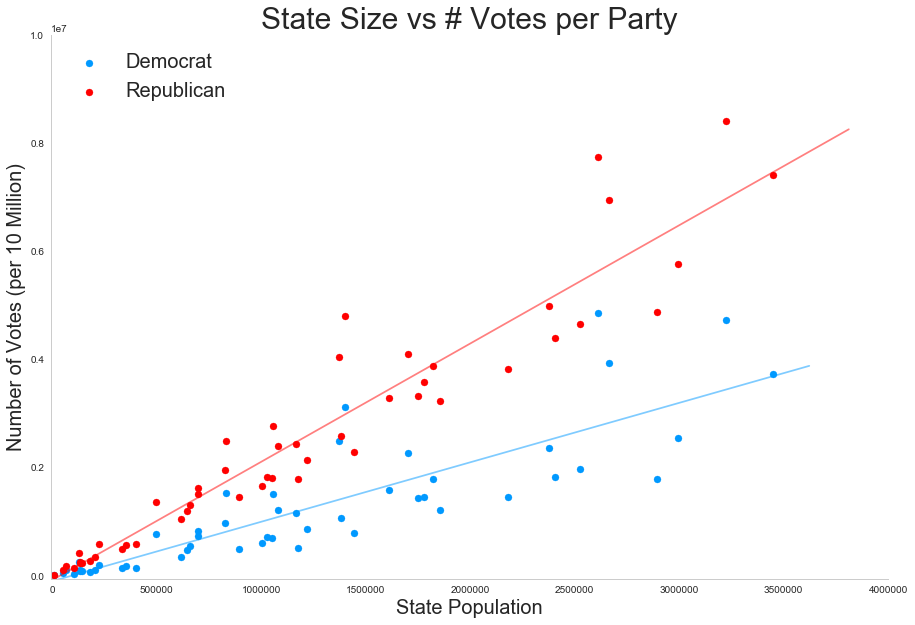

In [347]:
plt.figure(figsize=(15,10))
plt.scatter(vote_stuff['total_votes'][1],vote_stuff['dem_votes'][1], 
            color='#0099ff', label="Democrat", alpha=1)
axes = plt.gca()
m, b = np.polyfit(vote_stuff['total_votes'][1], vote_stuff['dem_votes'][1], 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-', c='#0099ff', alpha=.5)


plt.scatter(vote_stuff['total_votes'][1],vote_stuff['rep_votes'][1], 
            color='red', label="Republican", alpha=1)
m, b = np.polyfit(vote_stuff['total_votes'][1], vote_stuff['rep_votes'][1],1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-', c='red', alpha=.5)

plt.title("State Size vs # Votes per Party", fontsize=30, **hfont)
plt.grid(False)
plt.xlabel('State Population', fontsize=20)
plt.ylabel('Number of Votes (per 10 Million)', fontsize=20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc='upper left',prop={'size':20})
plt.xlim(-5000, 4000000)
plt.ylim(-50000,1e7)

plt.show()


def scatter_plots(republican_df, democrat_df, xvalue, title, xlab, ylab):
    plt.figure(figsize=(15,10))
    plt.scatter(xvalue,democrat_df, 
                color='#0099ff', label="Democrat", alpha=1)
    axes = plt.gca()
    m, b = np.polyfit(xvalue, democrat_df, 1)
    X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
    plt.plot(X_plot, m*X_plot + b, '-', c='#0099ff', alpha=.5)


    plt.scatter(xvalue,republican_df, 
                color='red', label="Republican", alpha=1)
    m, b = np.polyfit(xvalue, republican_df,1)
    X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
    plt.plot(X_plot, m*X_plot + b, '-', c='red', alpha=.5)

    plt.title(title, fontsize=30, **hfont)
    plt.grid(False)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.legend(loc='upper left',prop={'size':20})
    plt.xlim(-5000, 4000000)
    plt.ylim(-50000,1e7)

    plt.show()

Interestingly, it appears that the greater the state population size, the greater the number of Republican voters. 

Note that we necessarily expect a positive relationship between any party voter and state size, as increasing the voter pool can only add more votes for a given party. Still, it's interesting to note that this pattern seems more beneficial for Republicans than for Democrats - perhaps because 

# How does California change as a function of size?

In [352]:
# How does California change as a function of size?
all_californian_rep_votes = [i[4] for i in vote_stuff['rep_votes']]
all_californian_dem_votes = [i[4] for i in vote_stuff['dem_votes']]
all_californian_total_votes = [i[4] for i in vote_stuff['total_votes']]

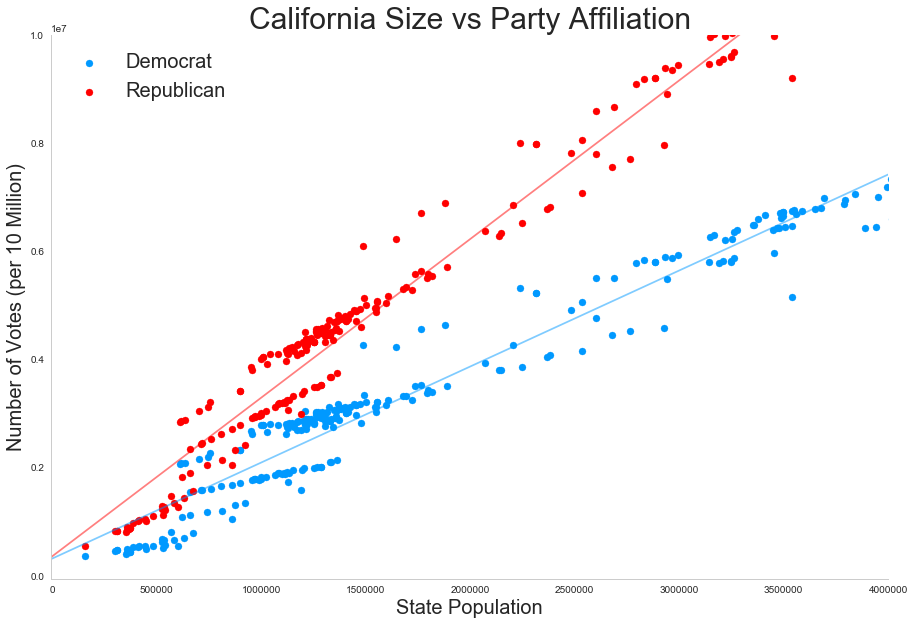

In [353]:
plt.figure(figsize=(15,10))
plt.scatter(all_californian_total_votes, all_californian_dem_votes, 
            color='#0099ff', label="Democrat", alpha=1)
axes = plt.gca()
m, b = np.polyfit(all_californian_total_votes, all_californian_dem_votes, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-', c='#0099ff', alpha=.5)


plt.scatter(all_californian_total_votes, all_californian_rep_votes, 
            color='red', label="Republican", alpha=1)
m, b = np.polyfit(all_californian_total_votes, all_californian_rep_votes,1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-', c='red', alpha=.5)

plt.title("California Size vs Party Affiliation", fontsize=30, **hfont)
plt.grid(False)
plt.xlabel('State Population', fontsize=20)
plt.ylabel('Number of Votes (per 10 Million)', fontsize=20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc='upper left',prop={'size':20})
plt.xlim(-5000, 4000000)
plt.ylim(-50000,1e7)

plt.show()

In [365]:
# allocate all pops together and try for that

# Random Investigations


# Correlation Among Features

In [11]:
# f, ax = plt.subplots(figsize=(6, 14))
# corr = election.corr()
# sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#             square=True, ax=ax)

# So, in it's current status, it apears that the electoral college favors Republicans.

# Let's view how this relationship changes as we change the appropriation amount of electoral college votes

Each state receives 3 electoral college vote. What if they only received 1?

In [22]:
def run_election_487(df, st='state', pop='population', ev='ev'):
    states = make_states(df, st)
    states[ev] = apportion(states[pop], states[st], seats_to_assign=487)
    return (sum(states.ev[states.win == 'R']), sum(states.ev[states.win == 'D']))

def store_data_487(k=100):
    data_storage = {'electoral_votes': [],
                   'winner': [],
                   'total_rep_states': [],
                   'total_dem_states': [],
                    'votes_per_state':[]
                   }
    
    for i in xrange(k):
        
        # generate new state
        new_states = randomize_election(election)
        
        # append electoral_votes to data_storage
        electoral_vote = run_election_487(new_states, st="newstate")
        data_storage['electoral_votes'].append(electoral_vote)
        
        # append state party victories
        data_storage['total_dem_states'].append(np.sum(new_states['win']=='D'))
        data_storage['total_rep_states'].append(np.sum(new_states['win']=='R'))
        
        # append election winner
        if electoral_vote[0] >= electoral_vote[1]:
            data_storage['winner'].append('R')
        else:
            data_storage['winner'].append('D')
        
        
        
    return data_storage 

In [23]:
data_487 = store_data_487()

In [43]:
def histograms_of_electoral_votes(rep_electoral, dem_electoral):
    hfont = {'fontname':'sans-serif'}
    fig = plt.figure(figsize=(12,9))
    ax1 = fig.add_subplot(2,1,1)
    ax1.hist(rep_electoral,22, alpha=0.7, label='Republican',rwidth=.9, color='red')
    ax1.axvline(x=269, c='k', linewidth=7)
    ax1.set_title("Histogram of Electoral Votes: Republicans", fontsize=20, **hfont)
    ax1.grid(False)
    ax1.set_xlabel('Number of Electoral Votes', fontsize=15)
    ax1.set_ylabel('Frequency', fontsize=14)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.set_xlim(200,370)
    ax1.set_facecolor('white')


    ax2 = fig.add_subplot(2,1,2)
    ax2.hist(dem_electoral, 22, alpha=0.7, label='Democrat',rwidth=.9, color='#0099ff')
    ax2.axvline(x=269, c='k', linewidth=7)
    ax2.set_title("Histogram of Electoral Votes: Democrats", fontsize=20, **hfont)
    ax2.grid(False)
    ax2.set_xlabel('Number of Electoral Votes', fontsize=15)
    ax2.set_ylabel('Frequency', fontsize=14)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.set_xlim(200,370)
    ax2.set_facecolor('white')

    plt.tight_layout()
    plt.show()

In [41]:
newdata487 = pd.DataFrame(data_487)
newdata487['rep_electoral'] = newdata487['electoral_votes'].apply(lambda x: x[0])
newdata487['dem_electoral'] = newdata487['electoral_votes'].apply(lambda x: x[1])

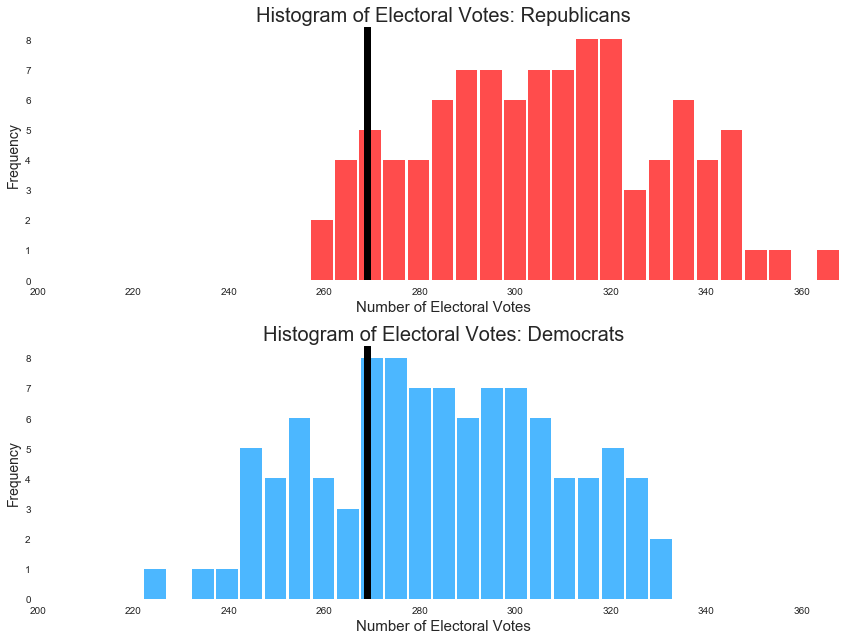

In [80]:
histograms_of_electoral_votes(newdata487['rep_electoral'],newdata487['dem_electoral'])

In [50]:
def histogram_of_total_states_won(rep_states, dem_states):
    hfont = {'fontname':'sans-serif'}
    fig = plt.figure(figsize=(12,9))
    ax1 = fig.add_subplot(2,1,1)
    ax1.hist(rep_states,10, alpha=0.7, label='Republican',rwidth=.9, color='red')
    ax1.axvline(x=25, c='k', linewidth=7)
    ax1.set_title("Histogram of Total States Won: Republicans", fontsize=20, **hfont)
    ax1.grid(False)
    ax1.set_xlabel('Number of Electoral Votes', fontsize=15)
    ax1.set_ylabel('Frequency', fontsize=14)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.set_xlim(10,40)
    ax1.set_facecolor('white')


    ax2 = fig.add_subplot(2,1,1)
    ax2.hist(dem_states, 10, alpha=0.7, label='Democrat',rwidth=.9, color='#0099ff')
    ax2.axvline(x=269, c='k', linewidth=7)
    ax2.set_title("Histogram of Total States Won by Party", fontsize=20, **hfont)
    ax2.grid(False)
    ax2.set_xlabel('Number of Electoral Votes', fontsize=15)
    ax2.set_ylabel('Frequency', fontsize=14)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.set_xlim(10,40)
    ax2.set_facecolor('white')

    plt.tight_layout()
    plt.show()

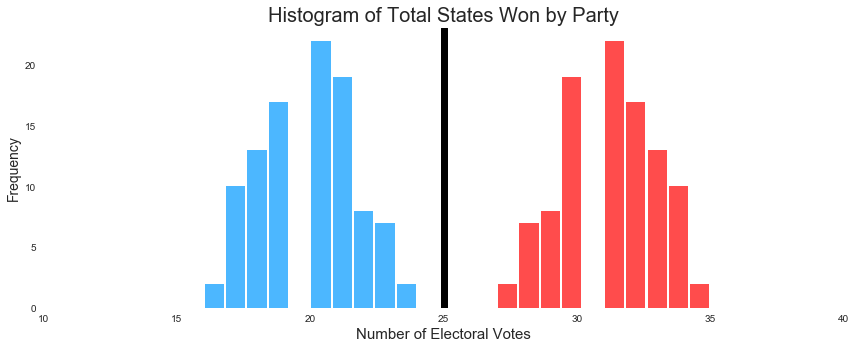

In [51]:
histogram_of_total_states_won(newdata487['total_rep_states'],newdata487['total_dem_states'])

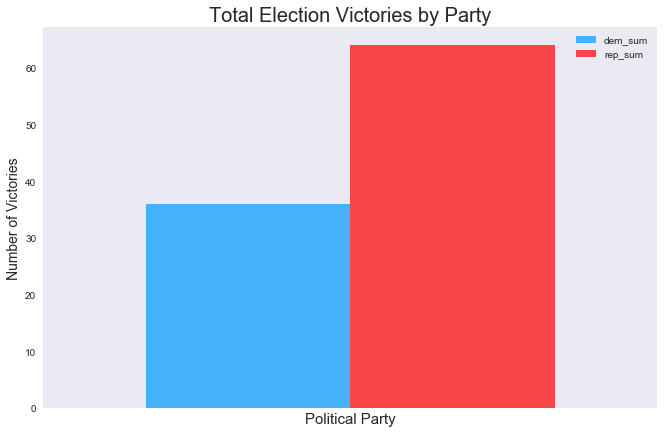

In [57]:
elec_votes = pd.DataFrame({'dem_sum': newdata487['winner'].value_counts()['D'],
                     'rep_sum': newdata487['winner'].value_counts()['R']}, 
                    index=[0])
plt.figure(figsize=(20,20), facecolor='white')
elec_votes.plot(kind='bar', color=['#0099ff','#ff0000'], width=1, alpha=.7, figsize=(11,7))
hfont = {'fontname':'sans-serif'}
plt.title("Total Election Victories by Party", fontsize=20, **hfont)
plt.grid(False)
plt.xlabel('Political Party', fontsize=15)
plt.ylabel('Number of Victories', fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks([])
ax.set_facecolor('white')

plt.show()

In [49]:
def scatter_plots(republican_df, democrat_df, xvalue, title, xlab, ylab):
    plt.figure(figsize=(15,10))
    plt.scatter(xvalue,democrat_df, 
                color='#0099ff', label="Democrat", alpha=1)
    axes = plt.gca()
    m, b = np.polyfit(xvalue, democrat_df, 1)
    X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
    plt.plot(X_plot, m*X_plot + b, '-', c='#0099ff', alpha=.5)


    plt.scatter(xvalue,republican_df, 
                color='red', label="Republican", alpha=1)
    m, b = np.polyfit(xvalue, republican_df,1)
    X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
    plt.plot(X_plot, m*X_plot + b, '-', c='red', alpha=.5)

    plt.title(title, fontsize=30, **hfont)
    plt.grid(False)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.legend(loc='upper left',prop={'size':20})
    plt.xlim(-5000, 4000000)
    plt.ylim(-50000,1e7)

    plt.show()

In [ ]:
scatter_plots(newdata487,newdata487,newdata487,"population", )

In [68]:
def run_election_436(df, st='state', pop='population', ev='ev'):
    states = make_states(df, st)
    states[ev] = apportion(states[pop], states[st], seats_to_assign=436)
    return (sum(states.ev[states.win == 'R']), sum(states.ev[states.win == 'D']))

def store_data_436(k=100):
    data_storage = {'electoral_votes': [],
                   'winner': [],
                   'total_rep_states': [],
                   'total_dem_states': []
                   # 'votes_per_state':[]
                   }
    
    for i in xrange(k):
        
        # generate new state
        new_states = randomize_election(election)
        
        # append electoral_votes to data_storage
        electoral_vote = run_election_487(new_states, st="newstate")
        data_storage['electoral_votes'].append(electoral_vote)
        
        # append state party victories
        data_storage['total_dem_states'].append(np.sum(new_states['win']=='D'))
        data_storage['total_rep_states'].append(np.sum(new_states['win']=='R'))
        
        # append election winner
        if electoral_vote[0] >= electoral_vote[1]:
            data_storage['winner'].append('R')
        else:
            data_storage['winner'].append('D')
        
        
        
    return data_storage 

In [69]:
data_436 = store_data_436()

In [72]:
newdata436 = pd.DataFrame(data_436)
newdata436['rep_electoral'] = newdata436['electoral_votes'].apply(lambda x: x[0])
newdata436['dem_electoral'] = newdata436['electoral_votes'].apply(lambda x: x[1])

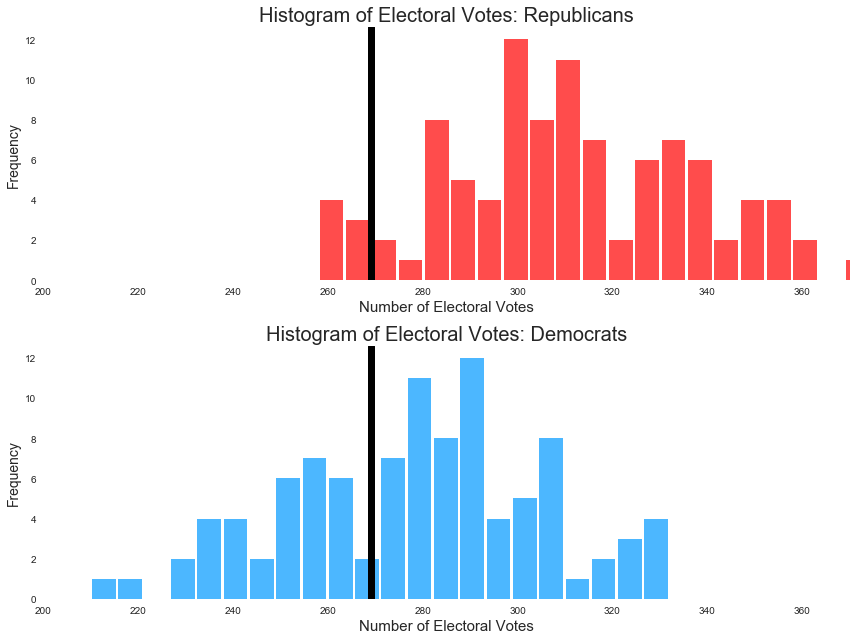

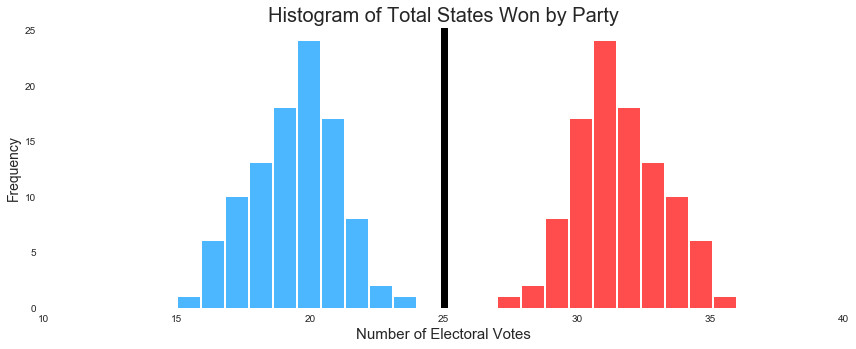

In [73]:
histograms_of_electoral_votes(newdata436['rep_electoral'],newdata436['dem_electoral'])
histogram_of_total_states_won(newdata436['total_rep_states'],newdata436['total_dem_states'])

In [74]:
def run_election_538(df, st='state', pop='population', ev='ev', seats_to_assign = ):
    states = make_states(df, st)
    states[ev] = apportion(states[pop], states[st], seats_to_assign=538)
    return (sum(states.ev[states.win == 'R']), sum(states.ev[states.win == 'D']))

def store_data_538(k=100):
    data_storage = {'electoral_votes': [],
                   'winner': [],
                   'total_rep_states': [],
                   'total_dem_states': []
                   }
    
    for i in xrange(k):
        
        # generate new state
        new_states = randomize_election(election)
        
        # append electoral_votes to data_storage
        electoral_vote = run_election_538(new_states, st="newstate")
        data_storage['electoral_votes'].append(electoral_vote)
        
        # append state party victories
        data_storage['total_dem_states'].append(np.sum(new_states['win']=='D'))
        data_storage['total_rep_states'].append(np.sum(new_states['win']=='R'))
        
        # append election winner
        if electoral_vote[0] >= electoral_vote[1]:
            data_storage['winner'].append('R')
        else:
            data_storage['winner'].append('D')
        
        
        
    return data_storage 

In [75]:
import time
t = time.time()
data_538 = store_data_538()
print time.time() - t

405.793852091


In [76]:
newdata538 = pd.DataFrame(data_538)
newdata538['rep_electoral'] = newdata538['electoral_votes'].apply(lambda x: x[0])
newdata538['dem_electoral'] = newdata538['electoral_votes'].apply(lambda x: x[1])

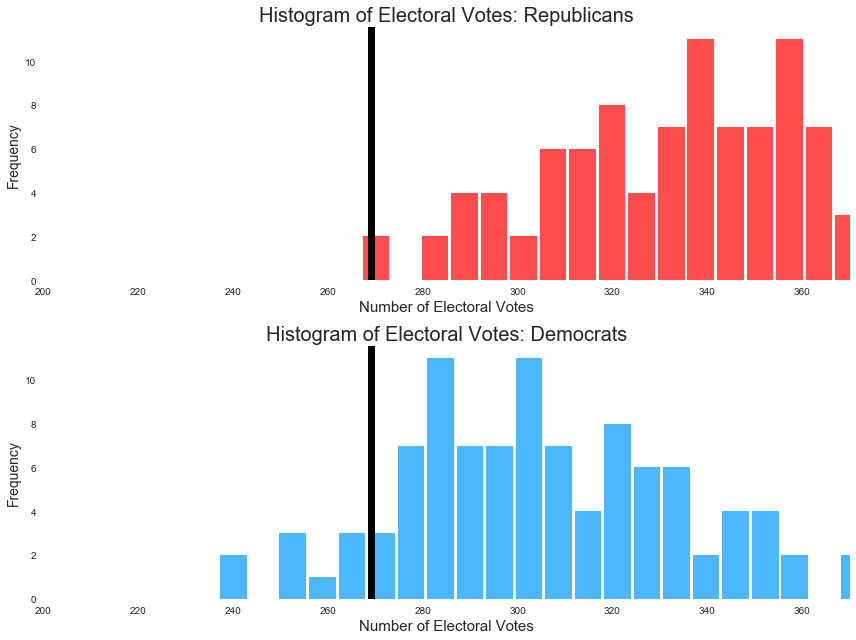

In [78]:
histograms_of_electoral_votes(newdata538['rep_electoral'],newdata538['dem_electoral'])

387

## To-do List:

1. Store simulation data collections into a single function (Replace code with this)
2. Only include total vote barplot once 
3. Total states won won't change with electoral votes much (or even at all?). What will change is the number of votes awarded to each state. We expect this quantity to decrease for Republicans as we increase the # of aportioned electoral votes
4. To analyze the # of states won per party, create a simulation of the mean # of states won per party. We can then construct confidence intervals for the # of wins per state, as well as avg wins per state and proportion of wins, etc. Store both of these plots on the same x-axis.
5. Barplots of total # of electoral votes won

WHAT CAN WE LEARN FROM RANDOMLY GENERATING STATE BOUNDARIES VS USING CURRENT 
Why randomize states? The idea is that state lines are essentially arbitary - while political opinions are not. Obviously, because we know our election is 

For example, looking at the two plots above, we can see that Republicans win more states on average than do Democrats, despite the overall vote count favoring Democrats over Republicans.

A county in Wisonsin should have the same voting contribution as does a county in California - that is, one should not receive more (or less) contribution to an election as a result of its geographic location. For this reason, simulations will be carried out 

WHAT DO WE LEARN FROM SIMULATION?
By simulating our results, we allow for a multitude of political outcomes not scarred by the arbitrariness of political boundaries. This hopefully yields the most representative result possible,  - providing an asymptotic relation to the 'true' will of the people. 






## Potential Outline
#### The Electoral College is Biased Against Democrats

Start with discussion/link of 4 votes changing election.
In light of the recent elections, the electoral college has found itself in a position of criticism. And rightfully so - [Reforming two state borders and shifting four counties would have resulted in a Hillary Clinton victory](https://www.washingtonpost.com/news/wonk/wp/2016/11/29/how-the-electoral-college-gerrymanders-the-presidential-vote/?utm_term=.d4753936b7c7). On the one hand, people claim ____, while on the other, people claim ____. Regardless, the USA prides itself on being a symbol of democracy, so of course it's electoral structure to be equitable, right? Not really. 

[Pictured: Stronghold of Democracy]

To investigate, we'll randomize state structure. Vote contribution should be uniform; a county in Wisonsin should have the same voting contribution as does a county in California: Joe Smith in Wisonsin shouldn't have more of a voting contribution than Mary Lee in Delaware or Chad Yee in California. Party loyalty is drawn from a myriad of sources, such as life experiences, work, etc. State geography, on the other hand, is arbitrary. Joe Smith's vote will be the same regardless of whether or not the state boundary surrounding him belongs to Nevada or California (though its contribution may not).
Simulating voter distribution among random states will give us a more accurate depiction of how US citizens are voting, regardless of state lines. It will also illuminate the arbitrariness of the electoral vote.

Let's see how our democracy stronghold may look if state lines were generated differently.

[INSERT SHUFFLED PLOT]

Cool. And let's see how some states win by election.

[INSERT 2x2]

We can also view election wins on a state-by-state breakdown. Simulating 1000 such randomizations, we obtain the following vote breakdown per state.

[VOTE BY STATE PLOT]

Analyze plots. Why Cali changes in size

This simulation also reveals enlightening information about the electoral college. Let's view the distribution of electoral votes per party across all 1,000  such simulations:

[ELECTORAL VOTES HISTOGRAMS]

The black line signifies the majority rule. Clearly, Republicans attain more electoral votes, more often than do Democrats.

They also consistently win states.

[State Bar Plots]

Talk about distributions

What's interesting is that this consistency in Republican domination exists *despite* Democrats having more majority votes. Discuss More

[ Insert Vote Barplot]

Other interesting trends occur as well. As the population of a state increases, so too does its propensity to vote Republican:

[insert scatter plot]

Discuss scatter plot.

#### Playing with the Electoral College

So how exactly does the electoral college favor Republicans? 3-vote uniform value. This isn't new information, but hopefully the above simulations reveal it's problem. 

Let's observe what happens when we change the number of allotted electoral college votes

[change]
analyze
[change]
analyze
[change]
analyze

##### Conclude
Ideally, if you live in a democracy, then regardless of your political loyalty you want a representative system. That is, you want a system where majority vote dictates rule.

# End Potential Outline


This occurs despite the number of votes 
Republicans win more states - probably because they live in more rural, spread out areas, while Democrats live in more densely populated areas. Thus Republicans have a higher probablitiy for being in a state. So, desite having more votes for Democrats, on average there are _ more Republican states won.
Cool plots, Jared - but what does any of this have to do with the electoral college?

So who's right? And does the electoral college favor
Here's a fun little thought experiment demonstrating the fundamental arbitrariness of the electoral college: Had two state borders been drawn just a little bit differently, shifting a total of four counties from one state to another, Hillary Clinton would have won the election.
In what follows, we'll investigate this phenomenon for ourselves. That is, how is th

In [145]:
x = [1,2,3]

In [146]:
x

[1, 2, 3]

In [148]:
[i*4 for i in x]

[4, 8, 12]

In [149]:
x = np.array(x)

In [150]:
x*4

array([ 4,  8, 12])

In [ ]:
pandas